In [1]:
from google.cloud import bigquery
from google.cloud import bigquery_storage
creds = "/Users/srdeo/OneDrive - Copart, Inc/secrets/cprtpr-datastewards-sp1-614d7e297848 (1).json"
client = bigquery.Client.from_service_account_json(json_credentials_path=creds)
bqstorageclient = bigquery_storage.BigQueryReadClient(credentials=creds)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

In [23]:
query = f"""
    SELECT
        m.owner_mbr_nbr,
        m.mbr_nbr,
        m.mbr_type,
        m.mbr_mbrshp_type_cd,
        e.event_type,
        e.event_value,
        DATE_TRUNC(e.event_value, MONTH) AS event_month,
        'April' AS month_label,
        CASE
            WHEN m.mbr_type = 'LPSDPREMIER' AND e.event_type = 'MEMBER TYPE UPDATED FROM PREMIER TO GUEST' THEN 1
            WHEN m.mbr_type = 'PREMIER' AND e.event_type = 'Member Premier Renewal Paid Date' THEN 0
            ELSE NULL
        END AS churn
    FROM `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact m
    JOIN `cprtpr-dataplatform-sp1`.usmart.v_us_member_events_fact e
        ON m.mbr_nbr = e.mbr_nbr
    WHERE (
        (m.mbr_type = 'PREMIER' AND e.event_type = 'Member Premier Renewal Paid Date') OR
        (m.mbr_type = 'LPSDPREMIER' AND e.event_type = 'MEMBER TYPE UPDATED FROM PREMIER TO GUEST')
    )
      AND e.event_value BETWEEN '2025-04-01' AND '2025-04-30'
      """

data1 = client.query(query).to_dataframe()

In [24]:
data1
print(data1.shape)
print(data1.isnull().sum())
print(data1['churn'].value_counts())

,owner_mbr_nbr,mbr_nbr,mbr_type,mbr_mbrshp_type_cd,event_type,event_value,event_month,month_label,churn
0,541967,541967,PREMIER,PREMIER,Member Premier Renewal Paid Date,2025-04-17 17:20:22+00:00,2025-04-01 00:00:00+00:00,April,0
1,111245,111245,PREMIER,PREMIER,Member Premier Renewal Paid Date,2025-04-04 08:04:56+00:00,2025-04-01 00:00:00+00:00,April,0
2,582198,582198,PREMIER,PREMIER,Member Premier Renewal Paid Date,2025-04-09 20:59:50+00:00,2025-04-01 00:00:00+00:00,April,0
3,612129,612129,PREMIER,PREMIER,Member Premier Renewal Paid Date,2025-04-29 08:01:58+00:00,2025-04-01 00:00:00+00:00,April,0
4,889952,889952,PREMIER,PREMIER,Member Premier Renewal Paid Date,2025-04-08 16:12:40+00:00,2025-04-01 00:00:00+00:00,April,0
...,...,...,...,...,...,...,...,...,...
6395,171130,171130,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-17 10:00:50+00:00,2025-04-01 00:00:00+00:00,April,1
6396,155447,155447,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-16 10:00:39+00:00,2025-04-01 00:00:00+00:00,April,1
6397,155670,155670,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-16 10:00:34+00:00,2025-04-01 00:00:00+00:00,April,1
6398,186373,186373,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-18 10:00:46+00:00,2025-04-01 00:00:00+00:00,April,1


(6400, 9)
owner_mbr_nbr         0
mbr_nbr               0
mbr_type              0
mbr_mbrshp_type_cd    0
event_type            0
event_value           0
event_month           0
month_label           0
churn                 0
dtype: int64
churn
1    3967
0    2433
Name: count, dtype: Int64


In [35]:
data1[data1['churn']==1]

,owner_mbr_nbr,mbr_nbr,mbr_type,mbr_mbrshp_type_cd,event_type,event_value,event_month,month_label,churn
2433,75297,75297,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-03 10:00:16+00:00,2025-04-01 00:00:00+00:00,April,1
2434,543973,543973,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-26 10:00:12+00:00,2025-04-01 00:00:00+00:00,April,1
2435,84877,84877,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-05 10:00:15+00:00,2025-04-01 00:00:00+00:00,April,1
2436,108690,108690,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-11 10:00:14+00:00,2025-04-01 00:00:00+00:00,April,1
2437,541698,541698,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-20 10:00:20+00:00,2025-04-01 00:00:00+00:00,April,1
...,...,...,...,...,...,...,...,...,...
6395,171130,171130,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-17 10:00:50+00:00,2025-04-01 00:00:00+00:00,April,1
6396,155447,155447,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-16 10:00:39+00:00,2025-04-01 00:00:00+00:00,April,1
6397,155670,155670,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-16 10:00:34+00:00,2025-04-01 00:00:00+00:00,April,1
6398,186373,186373,LPSDPREMIER,GUEST,MEMBER TYPE UPDATED FROM PREMIER TO GUEST,2025-04-18 10:00:46+00:00,2025-04-01 00:00:00+00:00,April,1


* Below query extracts unique owner mbr from above and converts into SQL IN clause format

In [25]:
owner_ids = data1['owner_mbr_nbr'].unique().tolist()
owner_ids_str = ", ".join([str(x) for x in owner_ids])

In [26]:
churn_list = data1[data1['churn'] == 1]['owner_mbr_nbr'].unique().tolist()

In [27]:
len(owner_ids)

6382

* Below query extracts all the lots sold in March and April 2025, excluding CDS

In [37]:
query = f"""
    WITH lot_fact_filtered AS (
      SELECT *
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_lot_fact
      WHERE inv_dt BETWEEN '2024-10-01' AND '2025-03-31'
        AND seller_parent_company != 'CDS'
    ),

    member_info AS (
      SELECT owner_mbr_nbr, mbr_nbr, mbr_state, mbr_country, member_sgmnt_type
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact
      WHERE owner_mbr_nbr IN ({owner_ids_str})
    ),

    bids_placed AS (
      SELECT
        m.owner_mbr_nbr,
        m.mbr_state,
        m.mbr_country,
        m.member_sgmnt_type,
        COUNTIF(l.inv_dt IS NOT NULL) AS total_bids_on_lots_sold
      FROM member_info m
      LEFT JOIN `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
        ON m.mbr_nbr = b.buyer_nbr
      LEFT JOIN lot_fact_filtered l
        ON b.lot_nbr = l.lot_nbr
      GROUP BY m.owner_mbr_nbr, m.mbr_state, m.mbr_country, m.member_sgmnt_type
    ),

    lots_bid_on AS (
      SELECT
        b.buyer_nbr AS owner_mbr_nbr,
        COUNT(DISTINCT b.lot_nbr) AS total_lots_placed_bids_on
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
      JOIN lot_fact_filtered l
        ON b.lot_nbr = l.lot_nbr
      GROUP BY b.buyer_nbr
    ),

    lots_won AS (
      SELECT
        l.buyer_nbr AS mbr_nbr,
        COUNT(DISTINCT l.lot_nbr) AS total_lots_won
      FROM lot_fact_filtered l
      GROUP BY l.buyer_nbr
    )

    SELECT
      bp.owner_mbr_nbr,
      bp.total_bids_on_lots_sold,
      lb.total_lots_placed_bids_on,
      w.total_lots_won,
      bp.mbr_state,
      bp.mbr_country,
      bp.member_sgmnt_type
    FROM bids_placed bp
    LEFT JOIN lots_bid_on lb ON bp.owner_mbr_nbr = lb.owner_mbr_nbr
    LEFT JOIN lots_won w ON bp.owner_mbr_nbr = w.mbr_nbr
    """
    # Run the query
data2 = client.query(query).to_dataframe()

In [38]:
data2
print(data2.shape)
print(data2.isnull().sum())
print(data2['owner_mbr_nbr'].nunique())

,owner_mbr_nbr,total_bids_on_lots_sold,total_lots_placed_bids_on,total_lots_won,mbr_state,mbr_country,member_sgmnt_type
0,74518,373,103,30,MA,USA,Dealer
1,220537,0,<NA>,<NA>,CA,USA,Consumer
2,872,1202,326,22,NC,USA,Dealer
3,694902,38,6,1,AK,USA,Consumer
4,164893,12,3,1,MN,USA,Consumer
...,...,...,...,...,...,...,...
6377,118837,0,<NA>,<NA>,MX,MEX,Exporter
6378,373695,0,<NA>,<NA>,MO,USA,Dealer
6379,297113,0,<NA>,<NA>,GE,GEO,Exporter
6380,865619,0,<NA>,<NA>,IL,USA,Consumer


(6382, 7)
owner_mbr_nbr                   0
total_bids_on_lots_sold         0
total_lots_placed_bids_on    3160
total_lots_won               4163
mbr_state                       0
mbr_country                     0
member_sgmnt_type             341
dtype: int64
6382


In [39]:
data2_copy = data2.copy()

In [40]:
data2_copy['churn'] = data2_copy['owner_mbr_nbr'].isin(churn_list).astype(int)

In [41]:
data2_copy

,owner_mbr_nbr,total_bids_on_lots_sold,total_lots_placed_bids_on,total_lots_won,mbr_state,mbr_country,member_sgmnt_type,churn
0,74518,373,103,30,MA,USA,Dealer,0
1,220537,0,<NA>,<NA>,CA,USA,Consumer,1
2,872,1202,326,22,NC,USA,Dealer,1
3,694902,38,6,1,AK,USA,Consumer,0
4,164893,12,3,1,MN,USA,Consumer,0
...,...,...,...,...,...,...,...,...
6377,118837,0,<NA>,<NA>,MX,MEX,Exporter,1
6378,373695,0,<NA>,<NA>,MO,USA,Dealer,1
6379,297113,0,<NA>,<NA>,GE,GEO,Exporter,1
6380,865619,0,<NA>,<NA>,IL,USA,Consumer,1


In [42]:
data2_copy['churn'].value_counts()

churn
1    3949
0    2433
Name: count, dtype: int64

In [55]:
data2_copy['owner_mbr_nbr'].nunique()

6382

In [44]:
data2_copy['winning_perc'] = np.round((data2_copy['total_lots_won'] / data2_copy['total_lots_placed_bids_on'])*100,2)

In [45]:
data2_copy

,owner_mbr_nbr,total_bids_on_lots_sold,total_lots_placed_bids_on,total_lots_won,mbr_state,mbr_country,member_sgmnt_type,churn,winning_perc
0,74518,373,103,30,MA,USA,Dealer,0,29.13
1,220537,0,<NA>,<NA>,CA,USA,Consumer,1,<NA>
2,872,1202,326,22,NC,USA,Dealer,1,6.75
3,694902,38,6,1,AK,USA,Consumer,0,16.67
4,164893,12,3,1,MN,USA,Consumer,0,33.33
...,...,...,...,...,...,...,...,...,...
6377,118837,0,<NA>,<NA>,MX,MEX,Exporter,1,<NA>
6378,373695,0,<NA>,<NA>,MO,USA,Dealer,1,<NA>
6379,297113,0,<NA>,<NA>,GE,GEO,Exporter,1,<NA>
6380,865619,0,<NA>,<NA>,IL,USA,Consumer,1,<NA>


<Axes: ylabel='Frequency'>

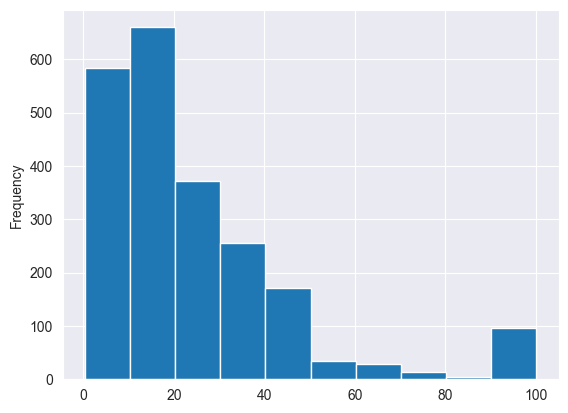

In [46]:
data2_copy['winning_perc'].plot(kind='hist')

In [54]:
filtered_df = data2_copy[(data2_copy['winning_perc'] <= 20) & (data2_copy['mbr_country'] == 'USA')]
filtered_df

,owner_mbr_nbr,total_bids_on_lots_sold,total_lots_placed_bids_on,total_lots_won,mbr_state,mbr_country,member_sgmnt_type,churn,winning_perc
2,872,1202,326,22,NC,USA,Dealer,1,6.75
3,694902,38,6,1,AK,USA,Consumer,0,16.67
20,758328,505,56,6,AL,USA,Dismantler,0,10.71
26,863223,763,197,2,WA,USA,General Business,1,1.02
31,526202,595,156,26,TX,USA,Consumer,0,16.67
...,...,...,...,...,...,...,...,...,...
6326,603792,39,17,2,PA,USA,Dismantler,0,11.76
6335,97787,363,76,8,AL,USA,Dismantler,0,10.53
6352,700903,98,20,3,VA,USA,Dealer,0,15.0
6370,503864,272,83,7,LA,USA,Consumer,0,8.43


In [61]:
query3 = """
WITH target_lots AS (
  SELECT DISTINCT b.lot_nbr
  FROM `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
  JOIN `cprtpr-dataplatform-sp1`.usviews.v_us_lot_fact l
    ON b.lot_nbr = l.lot_nbr
  WHERE b.buyer_nbr = 863223
    AND l.inv_dt BETWEEN '2024-10-01' AND '2025-03-31'
    AND l.seller_parent_company != 'CDS'
),

-- Step 2: Find all bids on those 8 lots by other buyers
other_bidders AS (
  SELECT
    b.lot_nbr,
    b.buyer_nbr,
    b.bid_amt,
    b.bid_dttm
  FROM `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
  JOIN target_lots tl
    ON b.lot_nbr = tl.lot_nbr
  WHERE b.buyer_nbr != 863223
)

-- Step 3: Optionally join member info for those other buyers
SELECT
  ob.lot_nbr,
  ob.buyer_nbr,
  m.owner_mbr_nbr,
  m.mbr_state,
  m.member_sgmnt_type,
  ob.bid_amt,
  ob.bid_dttm
FROM other_bidders ob
LEFT JOIN `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact m
  ON ob.buyer_nbr = m.mbr_nbr
ORDER BY ob.lot_nbr, ob.bid_amt DESC
"""

data3 = client.query(query3).to_dataframe()

In [62]:
data3

,lot_nbr,buyer_nbr,owner_mbr_nbr,mbr_state,member_sgmnt_type,bid_amt,bid_dttm
0,41344855,885609,488898,NJ,Dealer,15200.0,2025-03-18 20:28:24+00:00
1,41344855,893660,839801,AZ,Dealer,15100.0,2025-03-18 20:28:19+00:00
2,41344855,885609,488898,NJ,Dealer,15000.0,2025-03-18 20:28:10+00:00
3,41344855,893660,839801,AZ,Dealer,14900.0,2025-03-18 20:28:07+00:00
4,41344855,885609,488898,NJ,Dealer,14800.0,2025-03-18 20:28:01+00:00
...,...,...,...,...,...,...,...
18676,89409675,398218,398218,WA,Consumer,225.0,2025-01-28 23:12:45+00:00
18677,89409675,925487,925487,HN,Exporter,200.0,2025-01-28 23:12:45+00:00
18678,89409675,398218,398218,WA,Consumer,175.0,2025-01-28 18:43:01+00:00
18679,89409675,151834,151834,AZ,Dealer,150.0,2025-01-28 14:47:54+00:00


In [63]:
mbr_lst = data3['owner_mbr_nbr'].unique().tolist()

In [64]:
filtered_df[filtered_df['owner_mbr_nbr'].isin(mbr_lst)]

,owner_mbr_nbr,total_bids_on_lots_sold,total_lots_placed_bids_on,total_lots_won,mbr_state,mbr_country,member_sgmnt_type,churn,winning_perc
108,228799,228,80,1,WA,USA,Consumer,1,1.25
218,840446,1905,346,62,UT,USA,Dealer,0,17.92
236,772718,3134,662,73,CO,USA,Dealer,0,11.03
450,157896,159,20,2,KS,USA,Consumer,0,10.0
536,870714,3326,455,63,TN,USA,Dealer,0,13.85
1155,732984,3121,648,114,NH,USA,Dealer,0,17.59
1499,982066,1938,246,3,TX,USA,Consumer,0,1.22
1871,551652,873,123,4,OR,USA,Consumer,0,3.25
2555,623723,3736,464,76,TX,USA,Dealer,0,16.38
2599,715608,370,84,8,PA,USA,Consumer,1,9.52


* Including all members regardless of churn

In [66]:
query4 = f"""
    WITH lot_fact_filtered AS (
      SELECT *
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_lot_fact
      WHERE inv_dt BETWEEN '2024-10-01' AND '2025-03-31'
        AND seller_parent_company != 'CDS'
    ),

    member_info AS (
      SELECT owner_mbr_nbr, mbr_nbr, mbr_state, mbr_country, member_sgmnt_type
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_member_fact
    ),

    bids_placed AS (
      SELECT
        m.owner_mbr_nbr,
        m.mbr_state,
        m.mbr_country,
        m.member_sgmnt_type,
        COUNTIF(l.inv_dt IS NOT NULL) AS total_bids_on_lots_sold
      FROM member_info m
      LEFT JOIN `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
        ON m.mbr_nbr = b.buyer_nbr
      LEFT JOIN lot_fact_filtered l
        ON b.lot_nbr = l.lot_nbr
      GROUP BY m.owner_mbr_nbr, m.mbr_state, m.mbr_country, m.member_sgmnt_type
    ),

    lots_bid_on AS (
      SELECT
        b.buyer_nbr AS owner_mbr_nbr,
        COUNT(DISTINCT b.lot_nbr) AS total_lots_placed_bids_on
      FROM `cprtpr-dataplatform-sp1`.usviews.v_us_bids_fact b
      JOIN lot_fact_filtered l
        ON b.lot_nbr = l.lot_nbr
      GROUP BY b.buyer_nbr
    ),

    lots_won AS (
      SELECT
        l.buyer_nbr AS mbr_nbr,
        COUNT(DISTINCT l.lot_nbr) AS total_lots_won
      FROM lot_fact_filtered l
      GROUP BY l.buyer_nbr
    )

    SELECT
      bp.owner_mbr_nbr,
      bp.total_bids_on_lots_sold,
      lb.total_lots_placed_bids_on,
      w.total_lots_won,
      bp.mbr_state,
      bp.mbr_country,
      bp.member_sgmnt_type
    FROM bids_placed bp
    LEFT JOIN lots_bid_on lb ON bp.owner_mbr_nbr = lb.owner_mbr_nbr
    LEFT JOIN lots_won w ON bp.owner_mbr_nbr = w.mbr_nbr
    """
    # Run the query
data4 = client.query(query4).to_dataframe()